In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test=pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
train.shape

(159571, 8)

In [6]:
test.shape

(153164, 2)

In [7]:
train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [8]:
test.columns

Index(['id', 'comment_text'], dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [11]:
train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
train.describe(include='object')

,id,comment_text
count,159571,159571
unique,159571,159571
top,c4949f72aceb72ce,"""I do not agree that what I am doing is """"besm..."
freq,1,1


In [13]:
train.isnull().sum()


id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

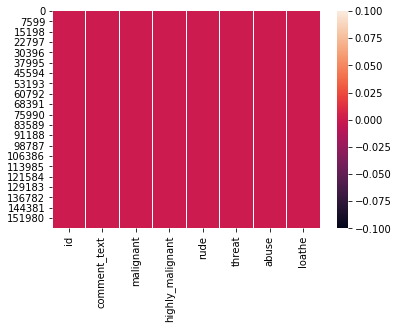

In [14]:
sns.heatmap(train.isnull())

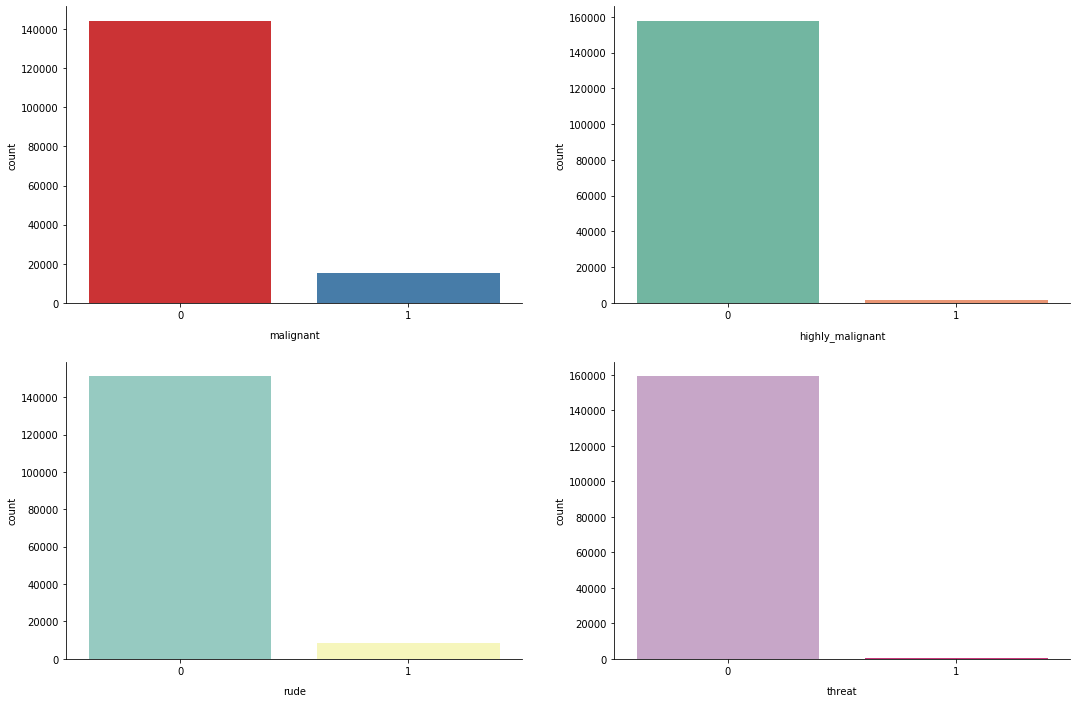

In [34]:
labels = [['malignant', 'highly_malignant'], ['rude', 'threat']]
colors = [['Set1', 'Set2'], ['Set3', 'PuRd']]

fig, ax = plt.subplots(2, 2, figsize=(18, 12))
for i in range(2):
    for j in range(2):
        feature = labels[i][j]
        color = colors[i][j]
        ax1 = sns.countplot(x=feature,  palette=color, data=train, ax=ax[i][j])
        ax1.set_xlabel(feature, labelpad=10)
       
sns.despine()

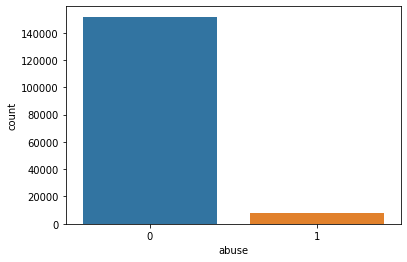

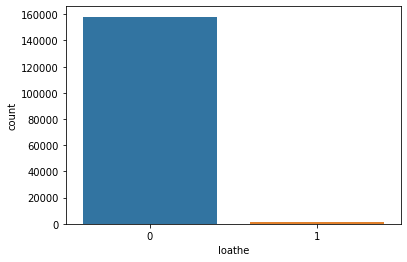

In [44]:
col=['abuse','loathe']
for i in col:
    sns.countplot(train[i])
    plt.show()

In [43]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print('bad comment ratio = ',round(len(train[train[i]==1])/len(train[i]),2)*100,'%')
    print('normalcomment ratio = ',round(len(train[train[i]==0])/len(train[i]),2)*100,'%')
    print("\n")
    

malignant


bad comment ratio =  10.0 %
normalcomment ratio =  90.0 %


highly_malignant


bad comment ratio =  1.0 %
normalcomment ratio =  99.0 %


loathe


bad comment ratio =  1.0 %
normalcomment ratio =  99.0 %


rude


bad comment ratio =  5.0 %
normalcomment ratio =  95.0 %


abuse


bad comment ratio =  5.0 %
normalcomment ratio =  95.0 %


threat


bad comment ratio =  0.0 %
normalcomment ratio =  100.0 %




In [45]:
train['length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [47]:
train['comment_text']=train['comment_text'].str.lower()

In [48]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [49]:
#remove punctuation
train['comment_text']=train['comment_text'].str.replace(r'[^\w\d\s]',' ')

#replace whitespace with a single space
train['comment_text']=train['comment_text'].str.replace(r'\s+',' ')

#remove leading and trailing whitespace
train['comment_text']=train['comment_text'].str.replace(r'^\s+|\s+?$','')

In [51]:
# remove '\\n'
train['comment_text'] = train['comment_text'].str.replace('\\n',' ')
    
# remove any text starting with User... 
train['comment_text'] = train['comment_text'].str.replace("\[\[User.*",'')
    
# remove IP addresses or user IDs
train['comment_text'] = train['comment_text'].str.replace("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}",'')
    
#remove http links in the text
train['comment_text'] = train['comment_text'].str.replace("(http://.*?\s)|(http://.*)",'')


In [52]:
#remove stopwords
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english')+['u','ur','4','2','in','dont','doin','ure'])
train['comment_text']=train['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\YaTiKa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67


In [54]:
train['clean_length']=train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,171
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,83
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,67,29


In [55]:
print('Original Length', train.length.sum())
print('Clean Length',train.clean_length.sum())

Original Length 62893130
Clean Length 40102550


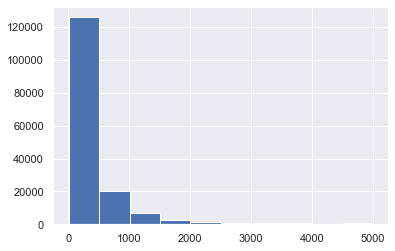

In [58]:
#  histogram plot for original length
sns.set()
train['length'].hist()
plt.show()


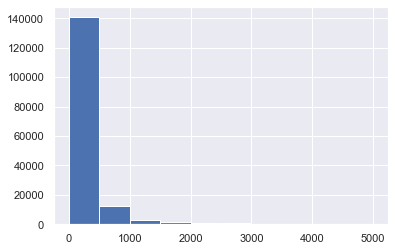

In [59]:
#  histogram plot for cleaned length
sns.set()
train['clean_length'].hist()
plt.show()

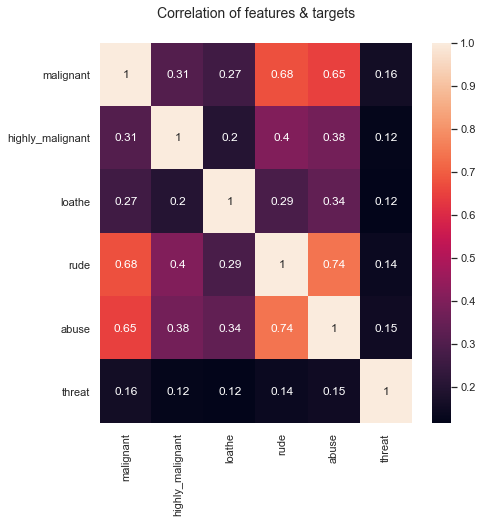

In [64]:
cols=['malignant','highly_malignant','loathe','rude','abuse','threat']
df = train[cols]
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(df.astype(float).corr(),annot=True)

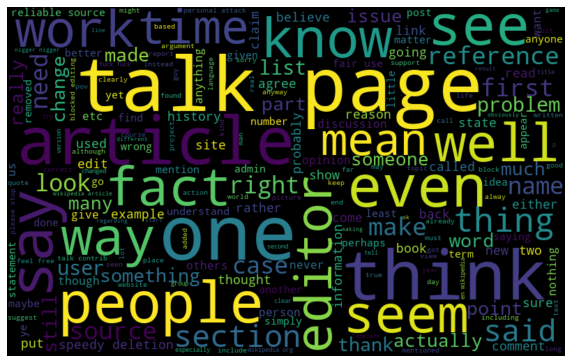

In [61]:
#word cloud for all words
from wordcloud import WordCloud

all_words = ' '.join([text for text in train['comment_text'] ])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

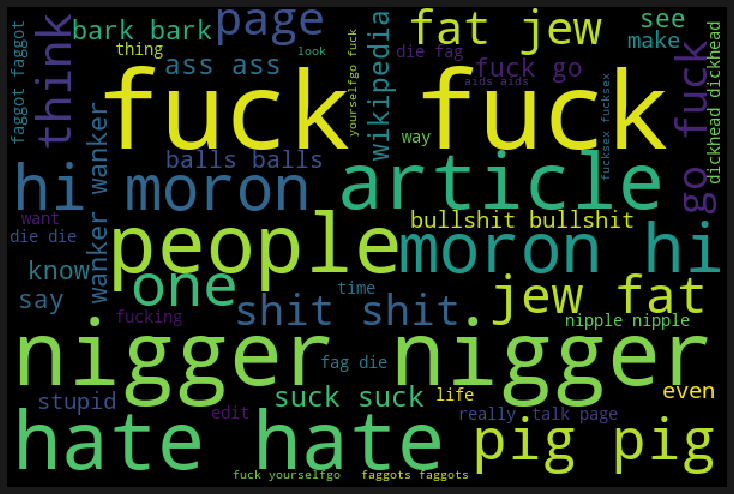

In [60]:

# loud words which are bad
from wordcloud import WordCloud
b = train['comment_text'][train['malignant']==1]
cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(b))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

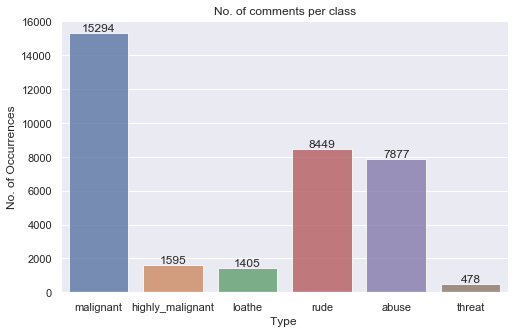

In [65]:
value_counts = train[cols].sum()

plt.figure(figsize=(8,5))
ax = sns.barplot(value_counts.index, value_counts.values, alpha=0.8)

plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

rects = ax.patches
labels = value_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()


In [66]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [67]:
target = train[cols]

train['bad'] =train[cols].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [69]:
print(train.shape)
print(test.shape)

(159571, 11)
(153164, 2)


In [70]:
y=train['bad']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [71]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [72]:
naive= MultinomialNB()

In [73]:
naive.fit(x_train,y_train)
y_pred=naive.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.9472969585561497


In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.94      0.52      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872



In [75]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[42777,   173],
       [ 2350,  2572]], dtype=int64)

In [76]:
from sklearn.tree import DecisionTreeClassifier 

In [77]:
model_tree=DecisionTreeClassifier()

In [78]:
model_tree.fit(x_train,y_train)
y_pred=model_tree.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.9403826871657754


In [79]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[41631,  1319],
       [ 1535,  3387]], dtype=int64)

In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.84     47872
weighted avg       0.94      0.94      0.94     47872



In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier(n_estimators=20,criterion='entropy')

In [84]:
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Final Score = > ', accuracy_score(y_test,y_pred))

Final Score = >  0.9526236631016043


In [85]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[42516,   434],
       [ 1834,  3088]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.88      0.63      0.73      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.81      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [91]:
test_df =tf_vec.fit_transform(test['comment_text'])
test_df

<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>

In [92]:
prediction=rf.predict(test_df)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
import joblib
joblib.dump(rf,"rf_comments.pkl")

['rf_comments.pkl']

In [99]:
predictions = pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction.csv')